# Loan Data
This dataset consists of more than 9,500 loans with information on the loan structure, the borrower, and whether the loan was pain back in full. This data was extracted from LendingClub.com, which is a company that connects borrowers with investors. 



## Data dictionary

|    | Variable          | Explanation                                                                                                             |
|---:|:------------------|:------------------------------------------------------------------------------------------------------------------------|
|  0 | credit_policy     | 1 if the customer meets the credit underwriting criteria; 0 otherwise.                                                  |
|  1 | purpose           | The purpose of the loan.                                                                                                |
|  2 | int_rate          | The interest rate of the loan (more risky borrowers are assigned higher interest rates).                                |
|  3 | installment       | The monthly installments owed by the borrower if the loan is funded.                                                    |
|  4 | log_annual_inc    | The natural log of the self-reported annual income of the borrower.                                                     |
|  5 | dti               | The debt-to-income ratio of the borrower (amount of debt divided by annual income).                                     |
|  6 | fico              | The FICO credit score of the borrower.                                                                                  |
|  7 | days_with_cr_line | The number of days the borrower has had a credit line.                                                                  |
|  8 | revol_bal         | The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).                           |
|  9 | revol_util        | The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available). |
| 10 | inq_last_6mths    | The borrower's number of inquiries by creditors in the last 6 months.                                                   |
| 11 | delinq_2yrs       | The number of times the borrower had been 30+ days past due on a payment in the past 2 years.                           |
| 12 | pub_rec           | The borrower's number of derogatory public records.                                                                     |
| 13 | not_fully_paid    | 1 if the loan is not fully paid; 0 otherwise.   

[Source](https://www.kaggle.com/itssuru/loan-data) of dataset.

# Loan Repayment Classification Project

## 📘 Introduction
This project uses LendingClub data to build a classification model that predicts whether a loan will be fully paid back. This is important for automating loan approval systems and minimizing financial risk.

We address:
- Exploratory Data Analysis (EDA)
- Class imbalance
- Hypothesis testing
- Machine learning model building and evaluation
- Business recommendations

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [40]:
#loading dataset
loan_data = pd.read_csv("loan_data.csv")
print(loan_data.shape)
loan_data.head(100)

(9578, 14)


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,debt_consolidation,0.0775,156.11,10.714418,5.00,762,2131.000000,1359,5.6,2,0,0,0
96,1,debt_consolidation,0.1154,329.95,12.323856,20.00,727,10292.000000,107501,44.8,2,0,0,0
97,1,all_other,0.0807,313.67,12.061047,0.72,787,8010.000000,3054,5.6,3,0,0,0
98,1,all_other,0.0807,297.99,11.407565,2.44,792,8717.958333,40384,9.6,0,0,0,0


In [41]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [42]:
# Convert categorical variable
purpose_dummies = pd.get_dummies(loan_data['purpose'], drop_first=True)
df = pd.concat([loan_data.drop('purpose', axis=1), purpose_dummies], axis=1)

In [43]:
purpose_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   credit_card         9578 non-null   bool 
 1   debt_consolidation  9578 non-null   bool 
 2   educational         9578 non-null   bool 
 3   home_improvement    9578 non-null   bool 
 4   major_purchase      9578 non-null   bool 
 5   small_business      9578 non-null   bool 
dtypes: bool(6)
memory usage: 56.2 KB


In [44]:
# Define features and label
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']


In [45]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   credit.policy       9578 non-null   int64  
 1   int.rate            9578 non-null   float64
 2   installment         9578 non-null   float64
 3   log.annual.inc      9578 non-null   float64
 4   dti                 9578 non-null   float64
 5   fico                9578 non-null   int64  
 6   days.with.cr.line   9578 non-null   float64
 7   revol.bal           9578 non-null   int64  
 8   revol.util          9578 non-null   float64
 9   inq.last.6mths      9578 non-null   int64  
 10  delinq.2yrs         9578 non-null   int64  
 11  pub.rec             9578 non-null   int64  
 12  credit_card         9578 non-null   bool   
 13  debt_consolidation  9578 non-null   bool   
 14  educational         9578 non-null   bool   
 15  home_improvement    9578 non-null   bool   
 16  major_

In [47]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Exploratory  Data Analysis

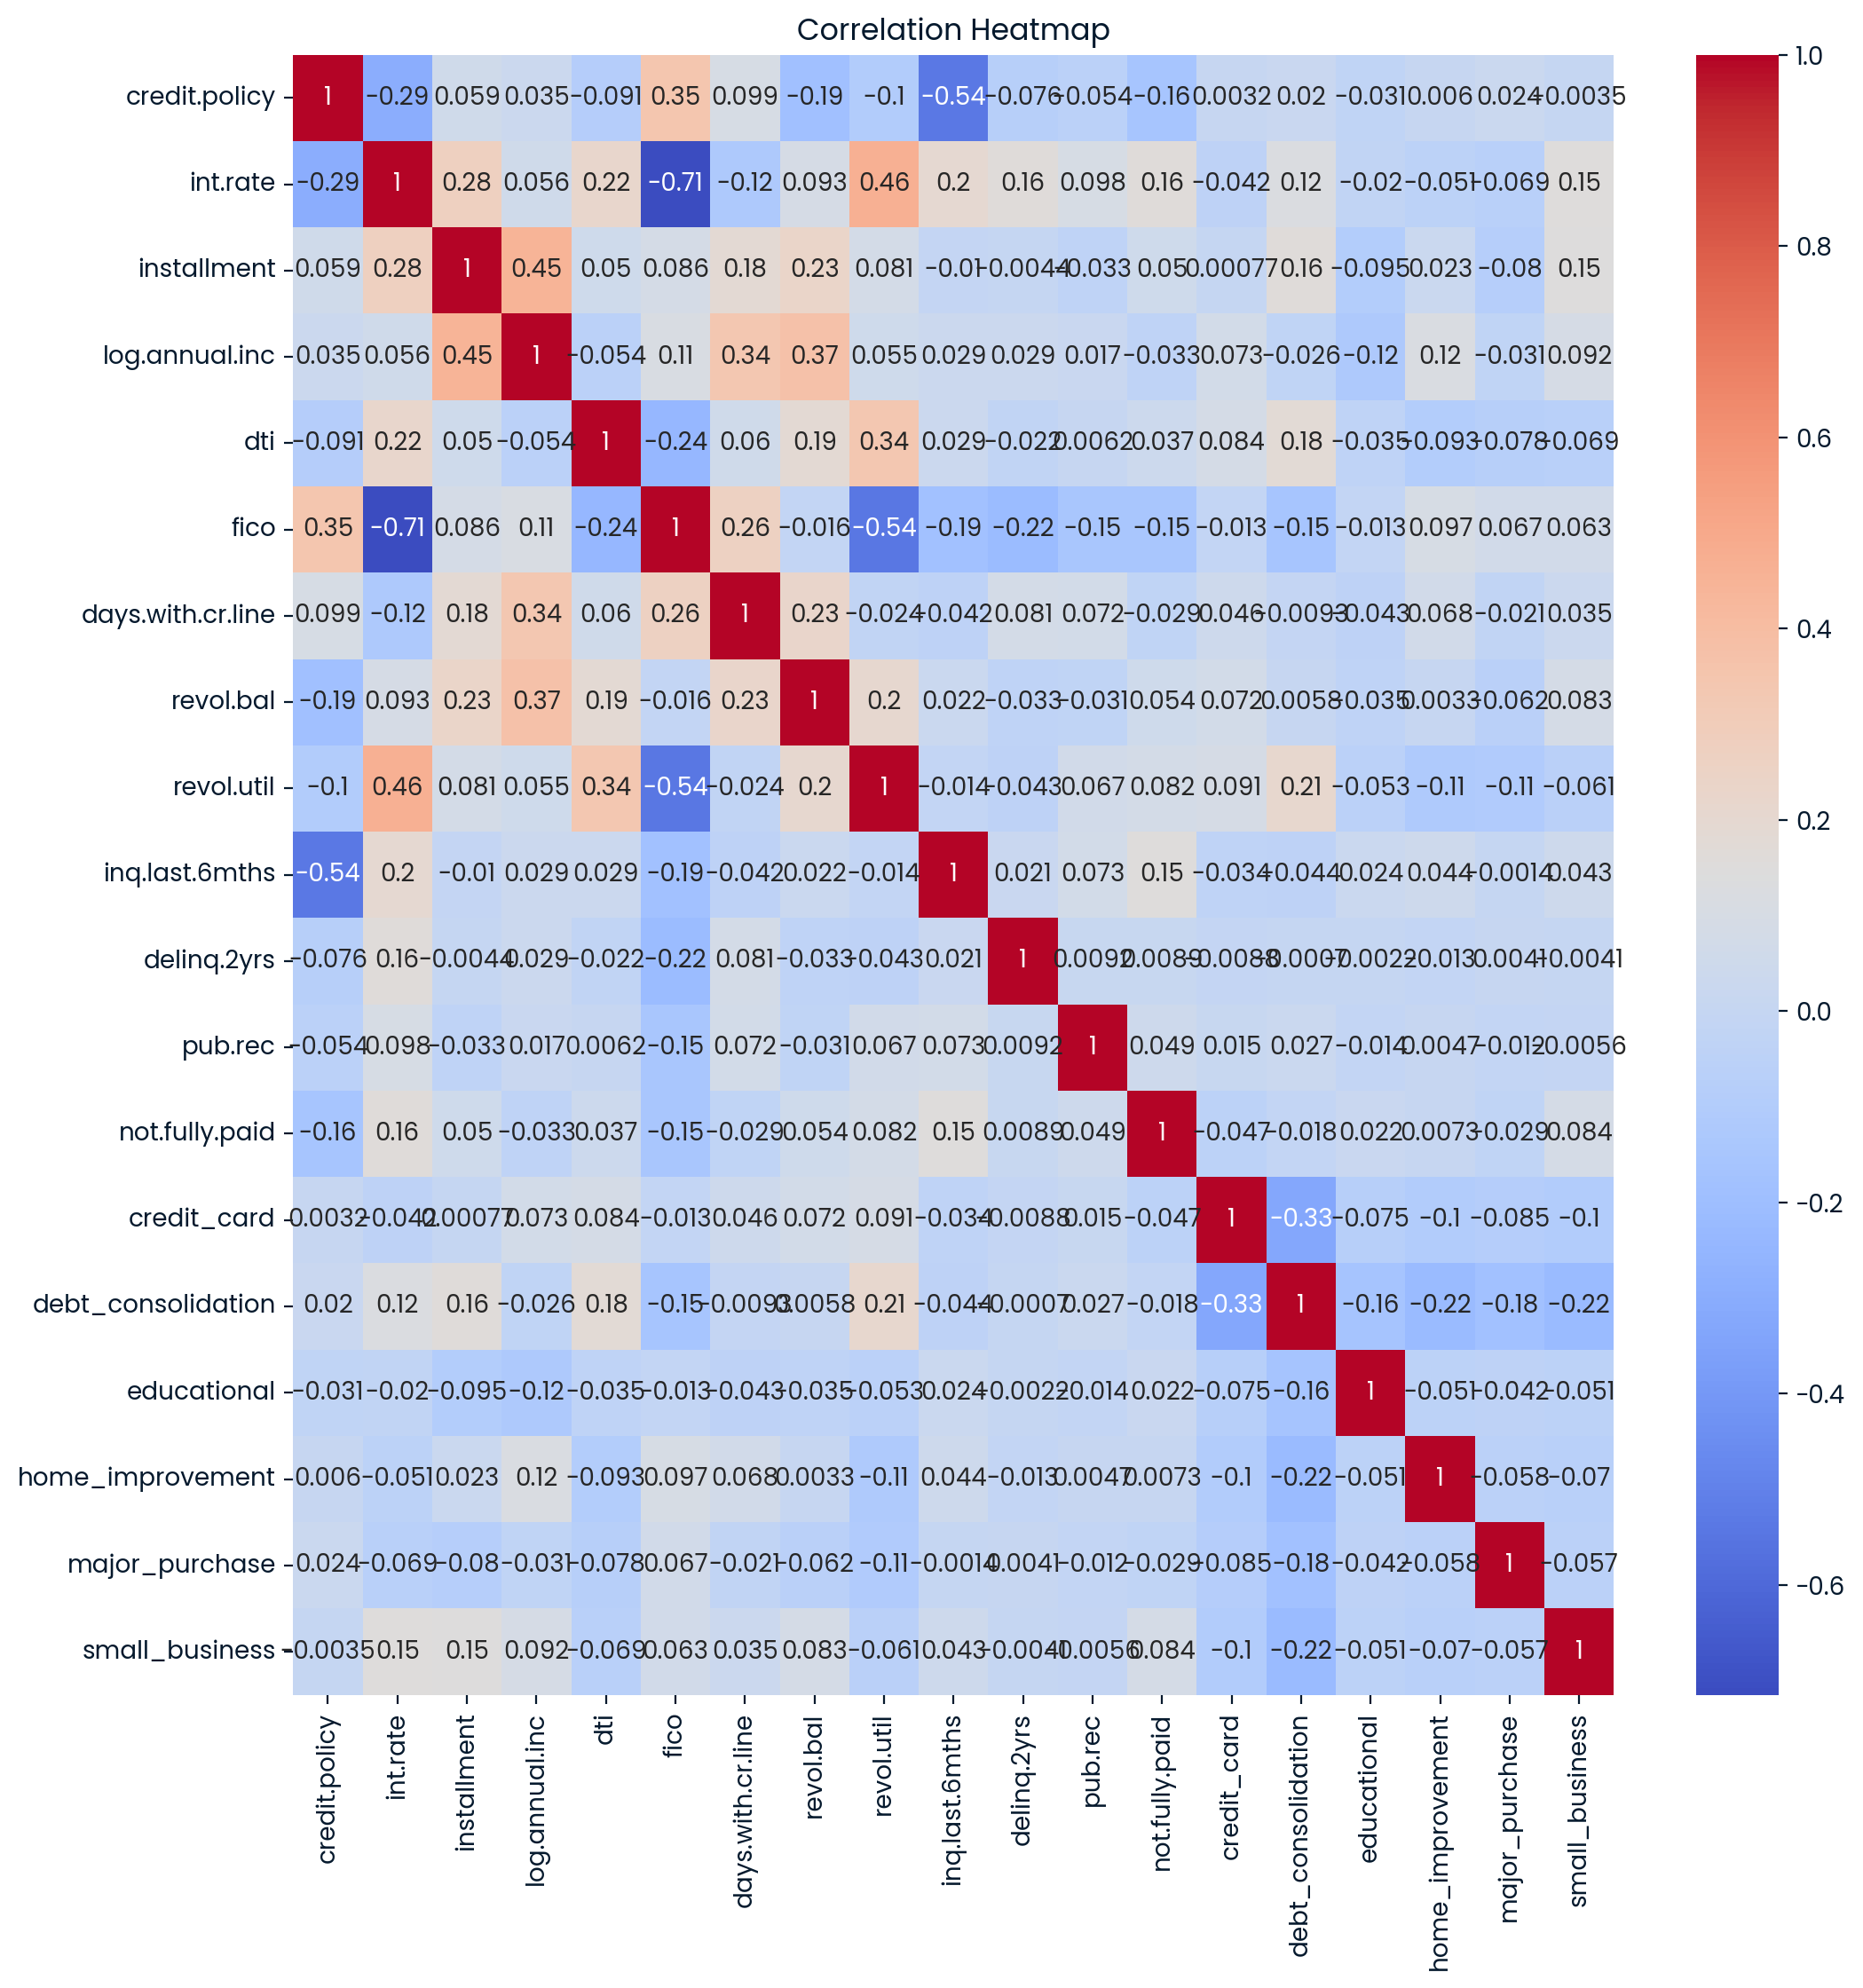

In [48]:
# Correlation heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

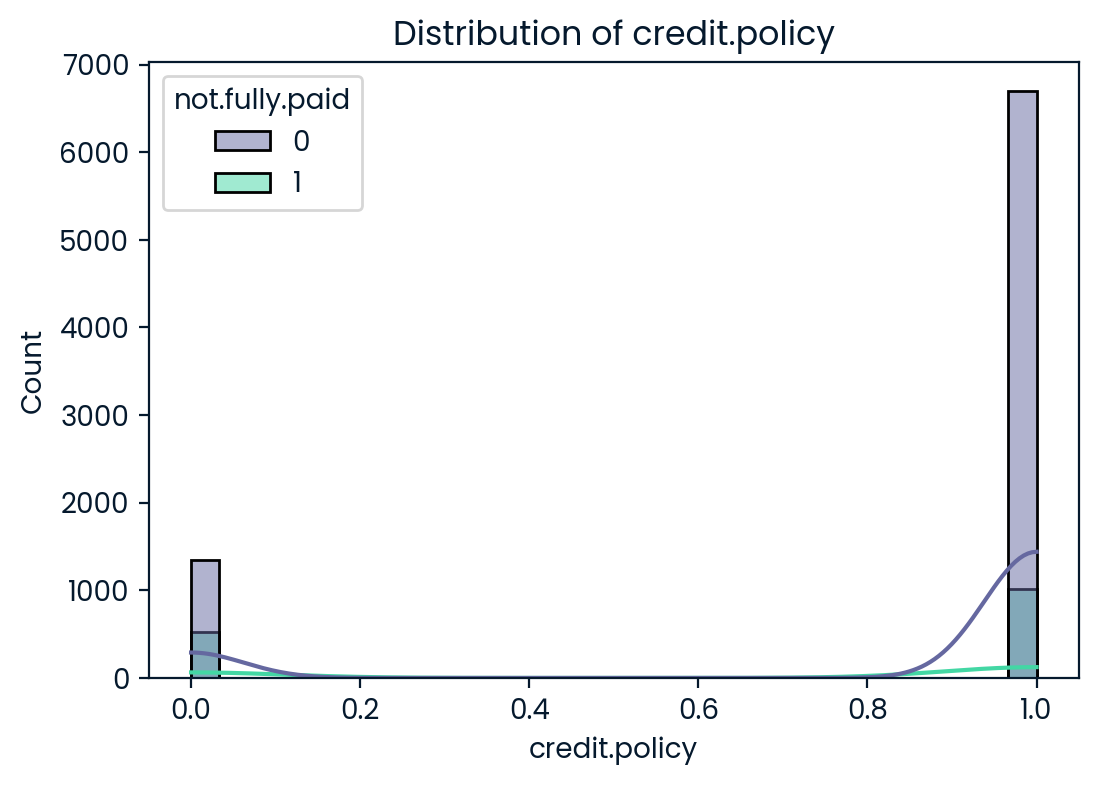

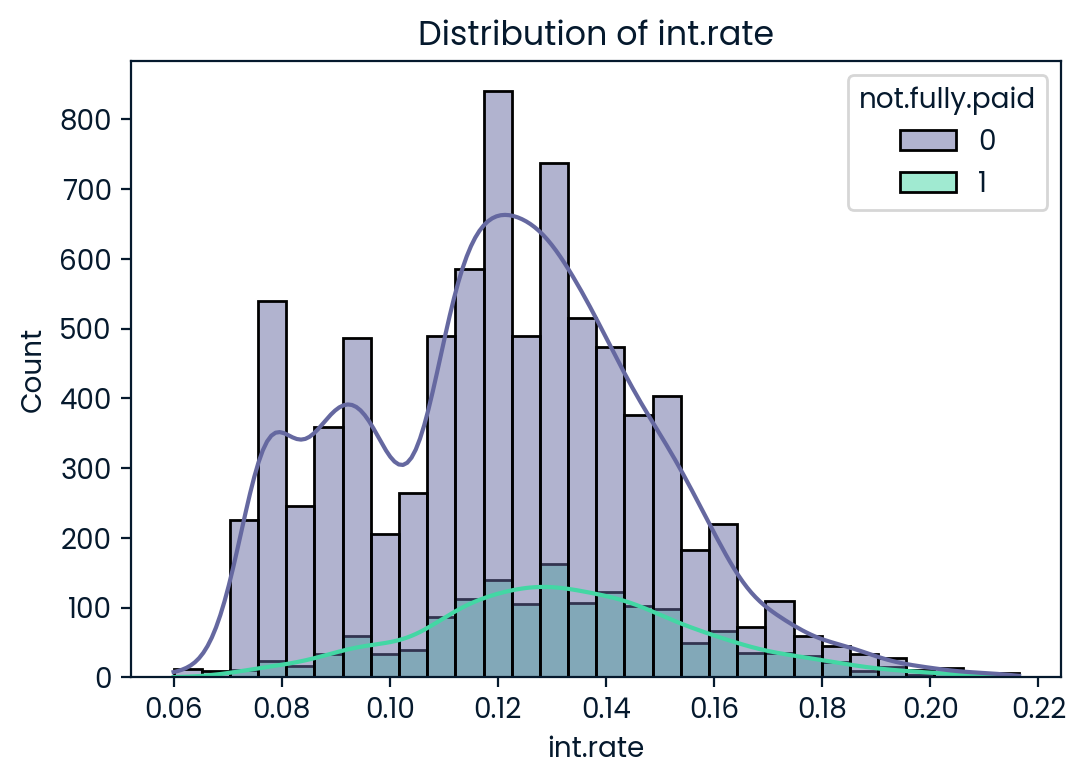

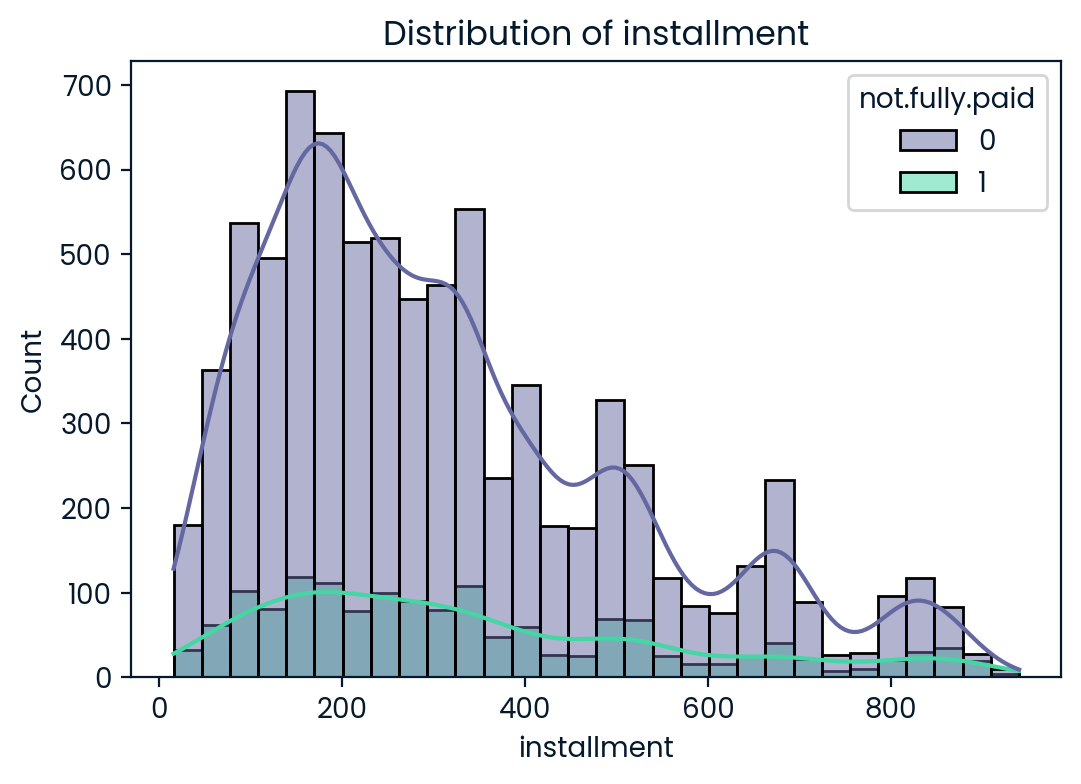

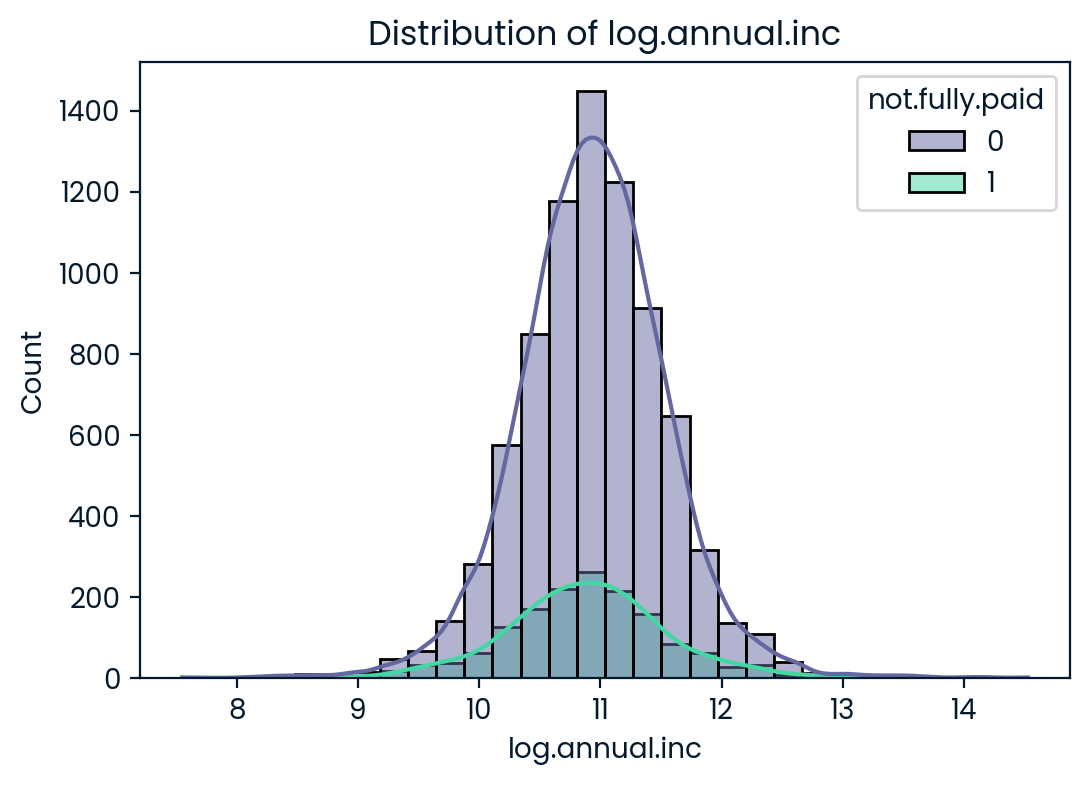

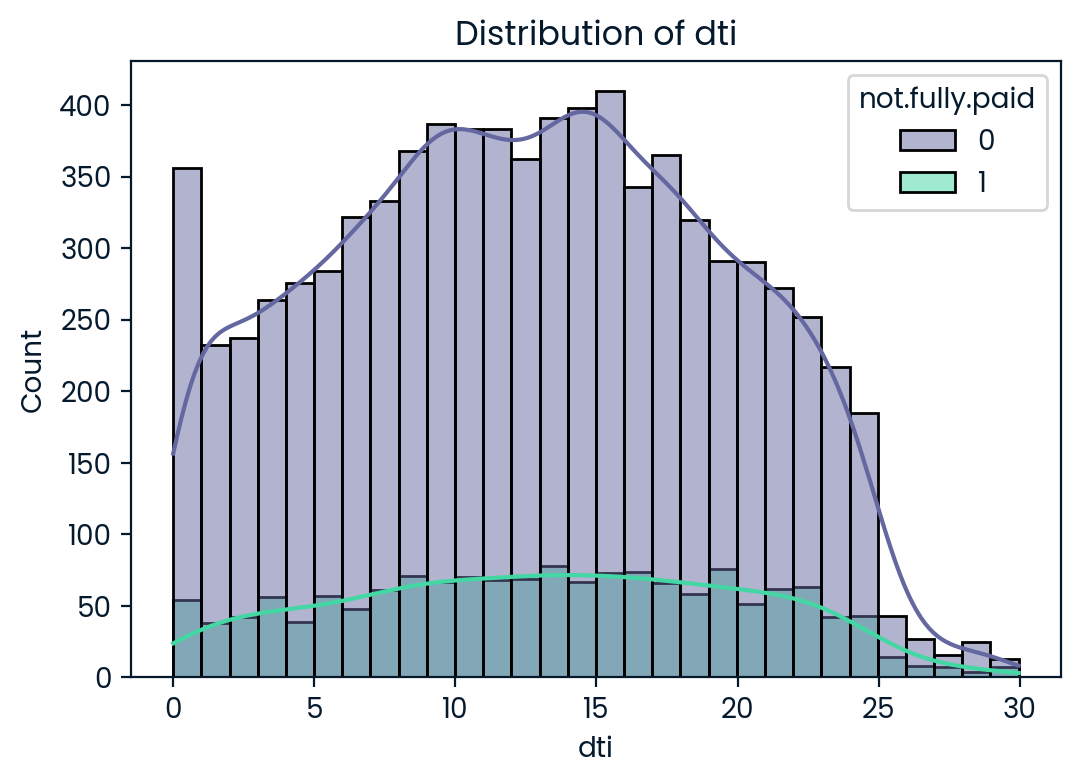

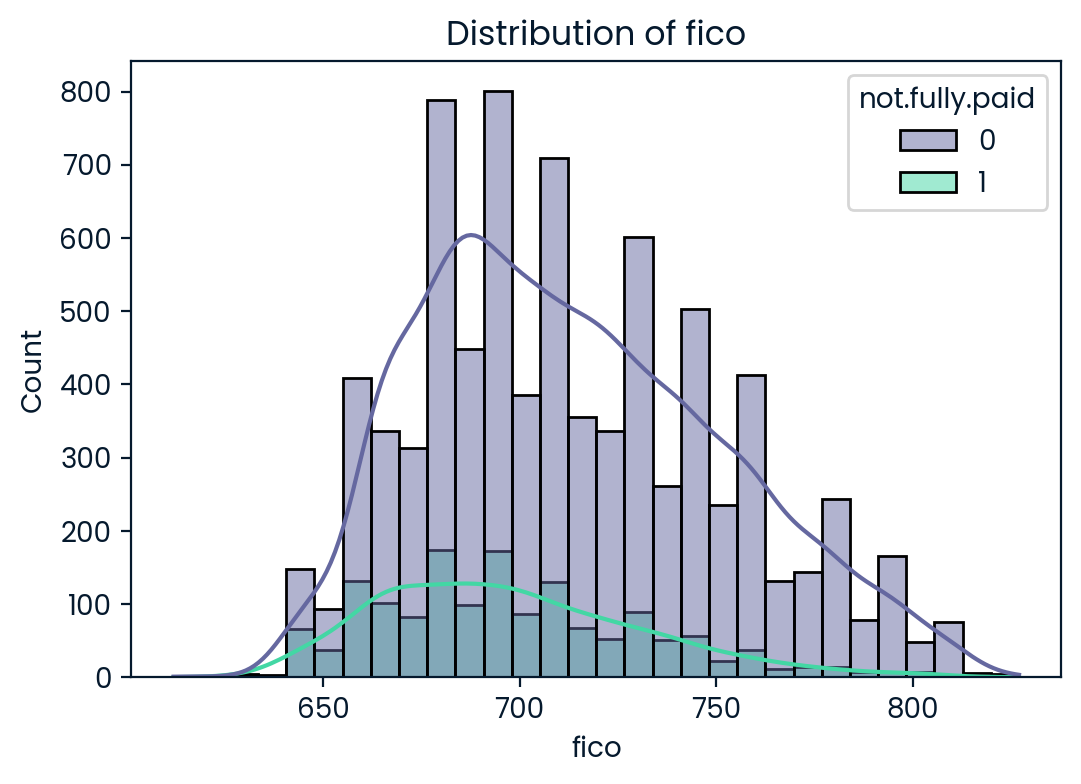

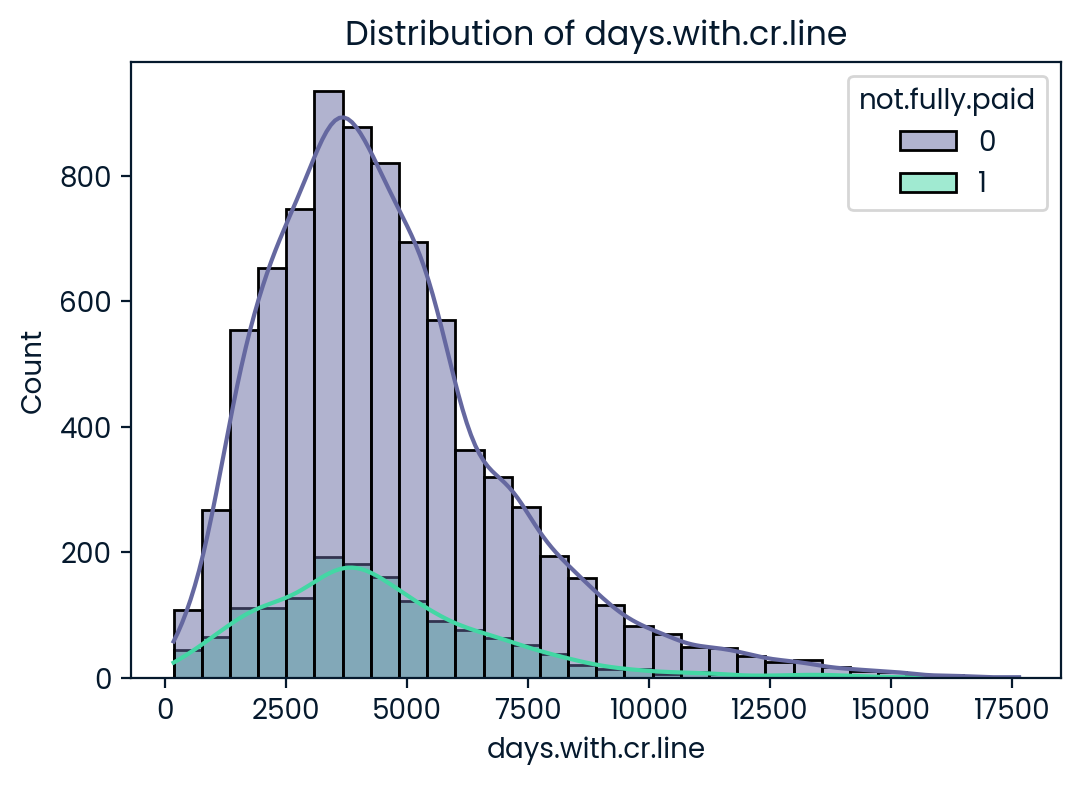

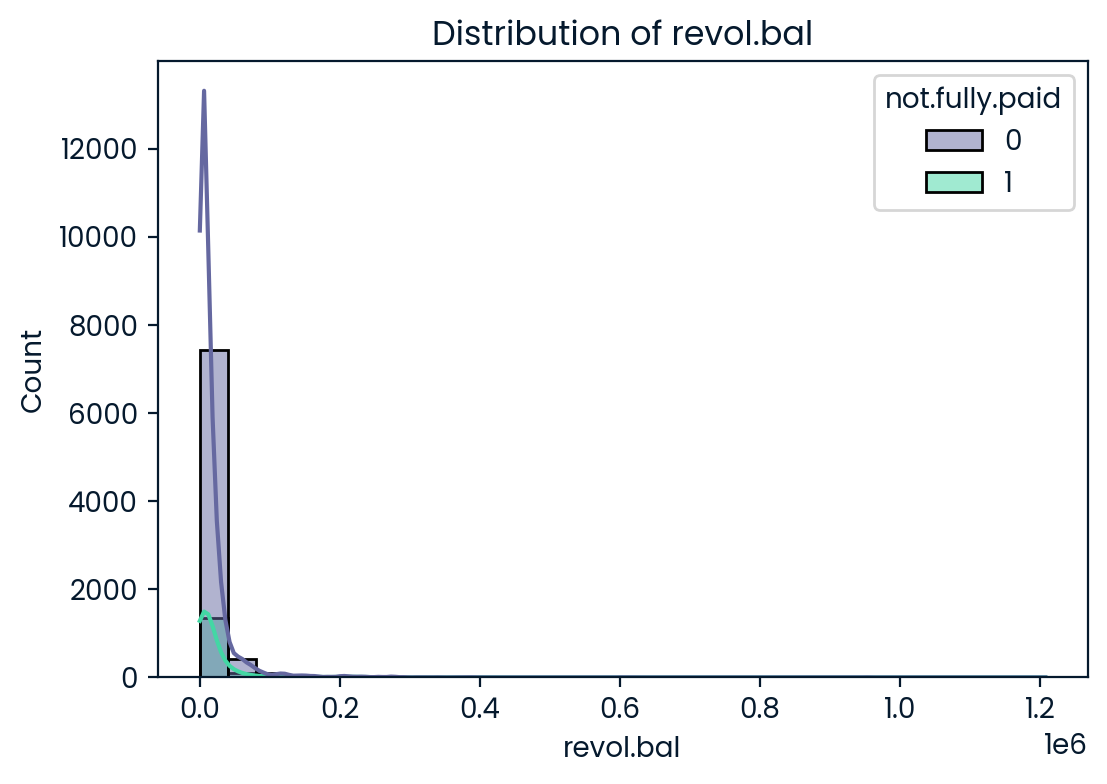

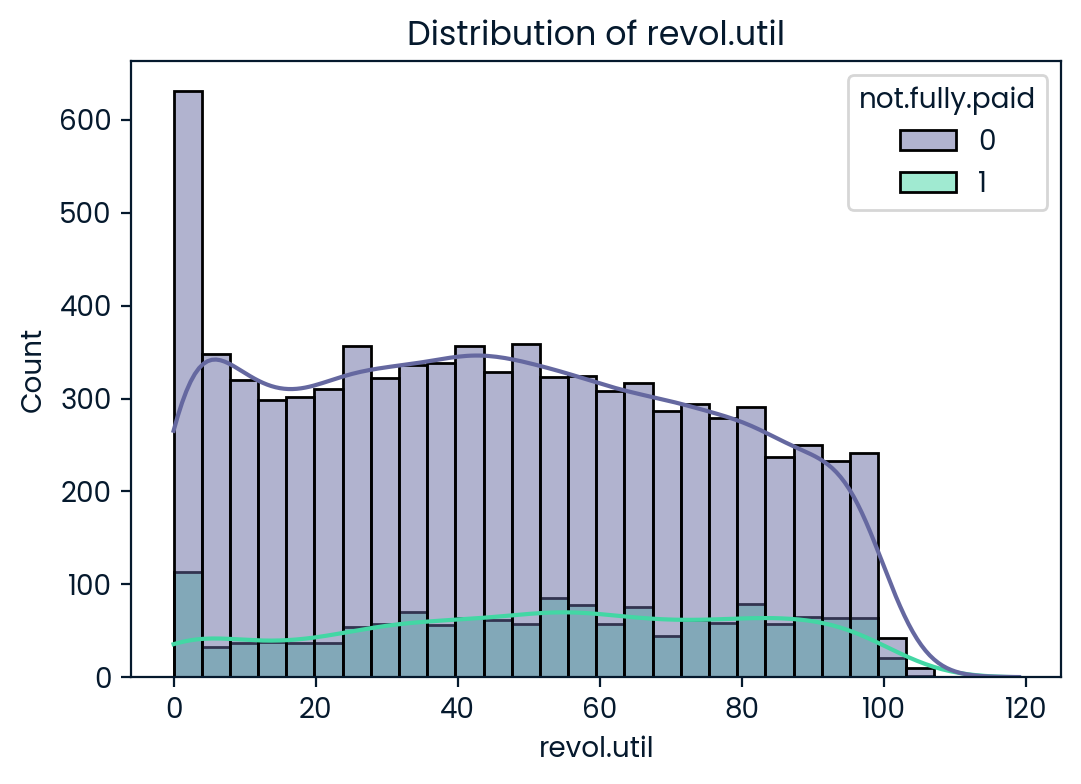

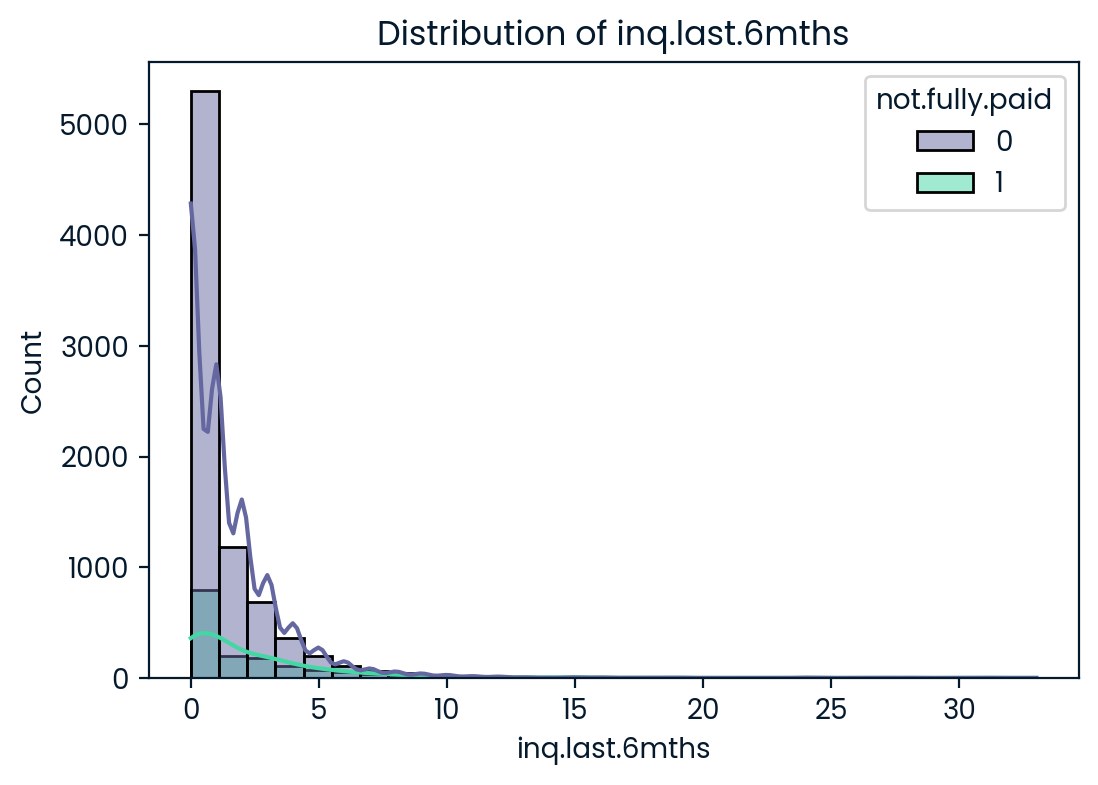

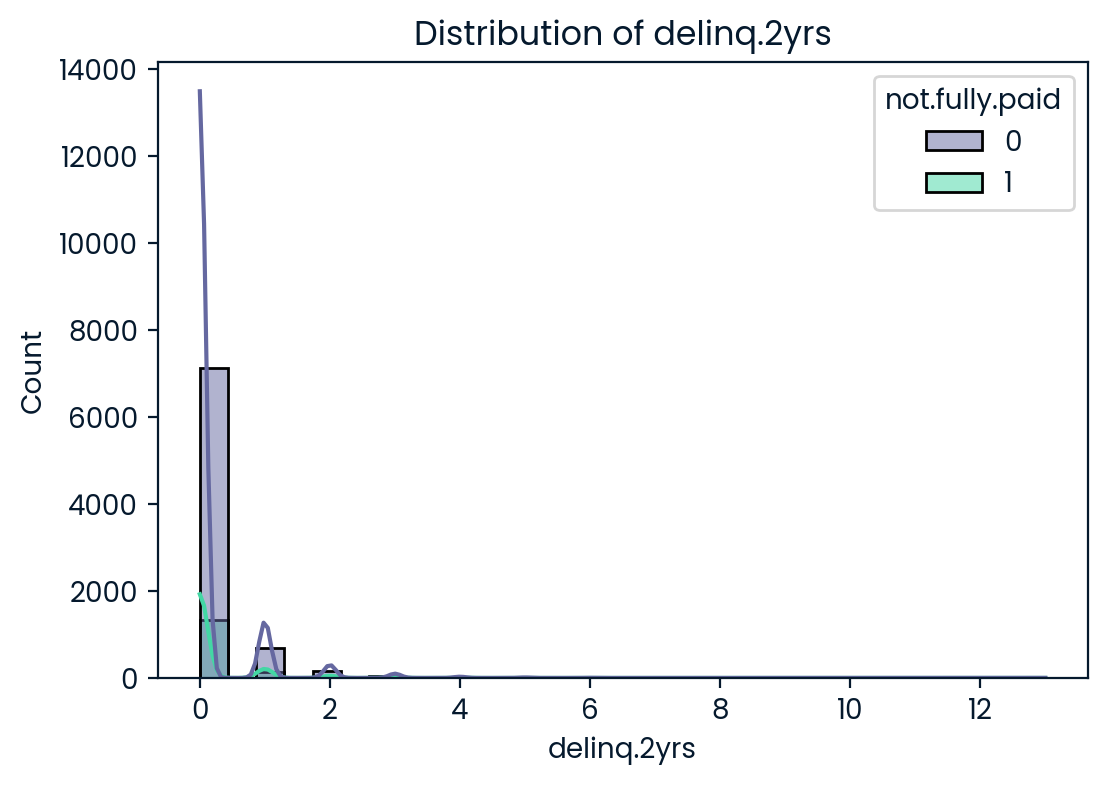

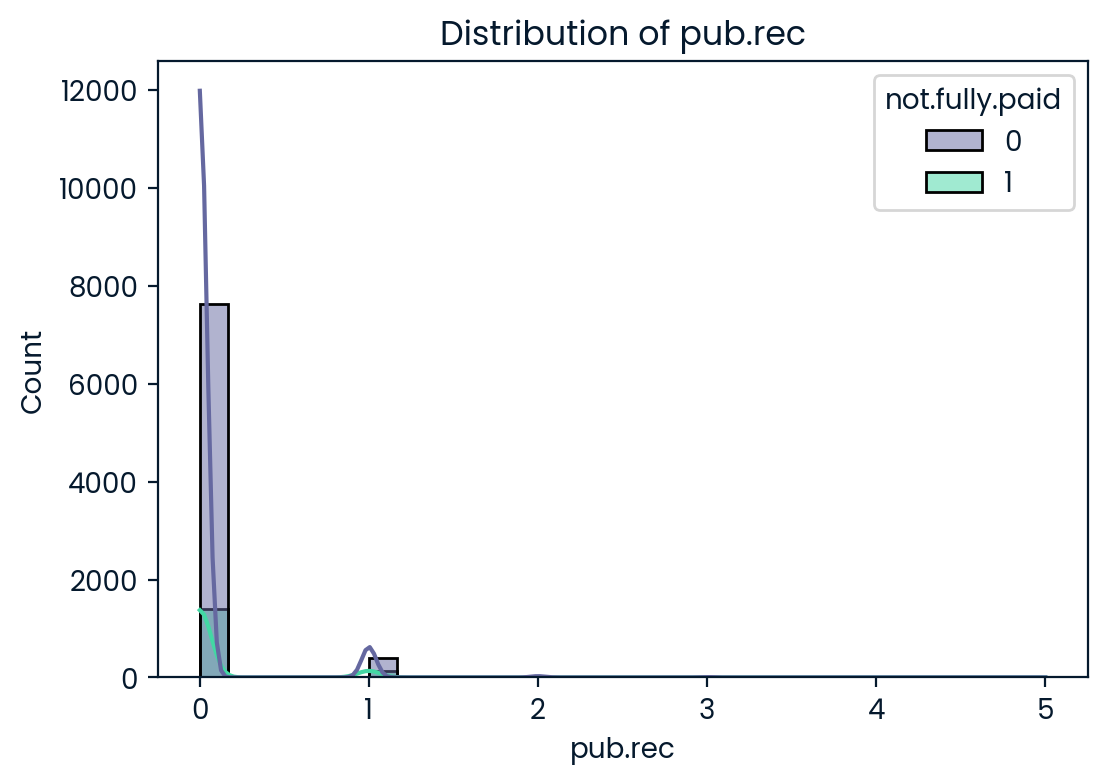

In [49]:
# Histogram segmented by repayment status
num_cols = df.select_dtypes(include=[np.number]).columns.drop("not.fully.paid")
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue="not.fully.paid", bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

## Hypothesis Testing

**alpha= 0.05**

H1: Loans with higher interest rates are more likely to be not fully paid
    t-test: compare int_rate means for not_fully_paid = 1 vs. 0

H2: Certain loan purposes have significantly higher default rates
    Chi-square test for independence between purpose and not_fully_paid


In [50]:
df.columns


Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'major_purchase', 'small_business'],
      dtype='object')

In [51]:
from scipy.stats import ttest_ind, chi2_contingency

# T-test: interest rates vs repayment
ttest_ind(df[df['not.fully.paid']==1]['int.rate'], df[df['not.fully.paid']==0]['int.rate'])


TtestResult(statistic=15.815852878788368, pvalue=1.2205604779871226e-55, df=9576.0)

In [52]:
# Chi-square: purpose vs repayment
contingency = pd.crosstab(df['not.fully.paid'], df['small_business'])
chi2_contingency(contingency)

Chi2ContingencyResult(statistic=67.39067909991456, pvalue=2.226993199344764e-16, dof=1, expected_freq=array([[7525.07360618,  519.92639382],
       [1433.92639382,   99.07360618]]))

### Conclusion from the hypothesis
### **Hypothesis Test Conclusions**
**H1**: Do borrowers who do not fully pay their loans have higher interest rates than those who do?
Null Hypothesis (H₀): There is no difference in interest rates between borrowers who fully repay and those who do not.

Alternative Hypothesis (H₁): Borrowers who do not fully repay their loans have higher interest rates.

p-value: 1.22e-55

**Conclusion:**
Since the p-value is far less than 0.05, we reject the null hypothesis.
There is strong statistical evidence that borrowers who fail to fully repay their loans tend to have significantly higher interest rates, supporting the idea that interest rate reflects loan risk.

**H2**: Is there an association between loan purpose and loan repayment status?
Null Hypothesis (H₀): Loan purpose and repayment status are independent.

Alternative Hypothesis (H₁): Loan purpose and repayment status are associated.

p-value: 2.23e-16

 **Conclusion**:
Since the p-value is significantly less than 0.05, we reject the null hypothesis.
There is a statistically significant association between the purpose of the loan and whether it was fully repaid or not. Certain loan purposes (e.g., small business) may carry higher risk.

In [53]:
## ⚖️ Handle Class Imbalance

print("Class distribution:", y_train.value_counts(normalize=True))

Class distribution: not.fully.paid
0    0.840841
1    0.159159
Name: proportion, dtype: float64


In [54]:
# SMOTE resampling
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [55]:
## 🤖 Model Training & Evaluation

# Logistic Regression
log_model = LogisticRegression(class_weight='balanced')
log_model.fit(X_res, y_res)
log_preds = log_model.predict(X_test)
print("Logistic Regression Report:\n", classification_report(y_test, log_preds))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.90      0.64      0.75      2408
           1       0.25      0.62      0.36       466

    accuracy                           0.64      2874
   macro avg       0.57      0.63      0.55      2874
weighted avg       0.79      0.64      0.68      2874



In [56]:
# Random Forest with hyperparameter tuning
params = {'n_estimators': [100, 200], 'max_depth': [5, 10, None]}
rf = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid=params, scoring='f1', cv=3)
rf.fit(X_res, y_res)
rf_preds = rf.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, rf_preds))

Random Forest Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      2408
           1       0.26      0.15      0.19       466

    accuracy                           0.79      2874
   macro avg       0.55      0.53      0.53      2874
weighted avg       0.75      0.79      0.77      2874



In [57]:
# Fit Random Forest with best parameters
best_rf = RandomForestClassifier(**rf.best_params_, class_weight='balanced')
best_rf.fit(X_res, y_res)
best_rf_preds = best_rf.predict(X_test)


In [58]:
print(classification_report(y_test, best_rf_preds))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      2408
           1       0.29      0.17      0.21       466

    accuracy                           0.80      2874
   macro avg       0.57      0.54      0.55      2874
weighted avg       0.76      0.80      0.78      2874



In [59]:
# XGBoost
xgb = XGBClassifier(scale_pos_weight=5)
xgb.fit(X_res, y_res)
xgb_preds = xgb.predict(X_test)
print("XGBoost Report:\n", classification_report(y_test, xgb_preds))

XGBoost Report:
               precision    recall  f1-score   support

           0       0.86      0.76      0.81      2408
           1       0.22      0.34      0.26       466

    accuracy                           0.70      2874
   macro avg       0.54      0.55      0.54      2874
weighted avg       0.75      0.70      0.72      2874



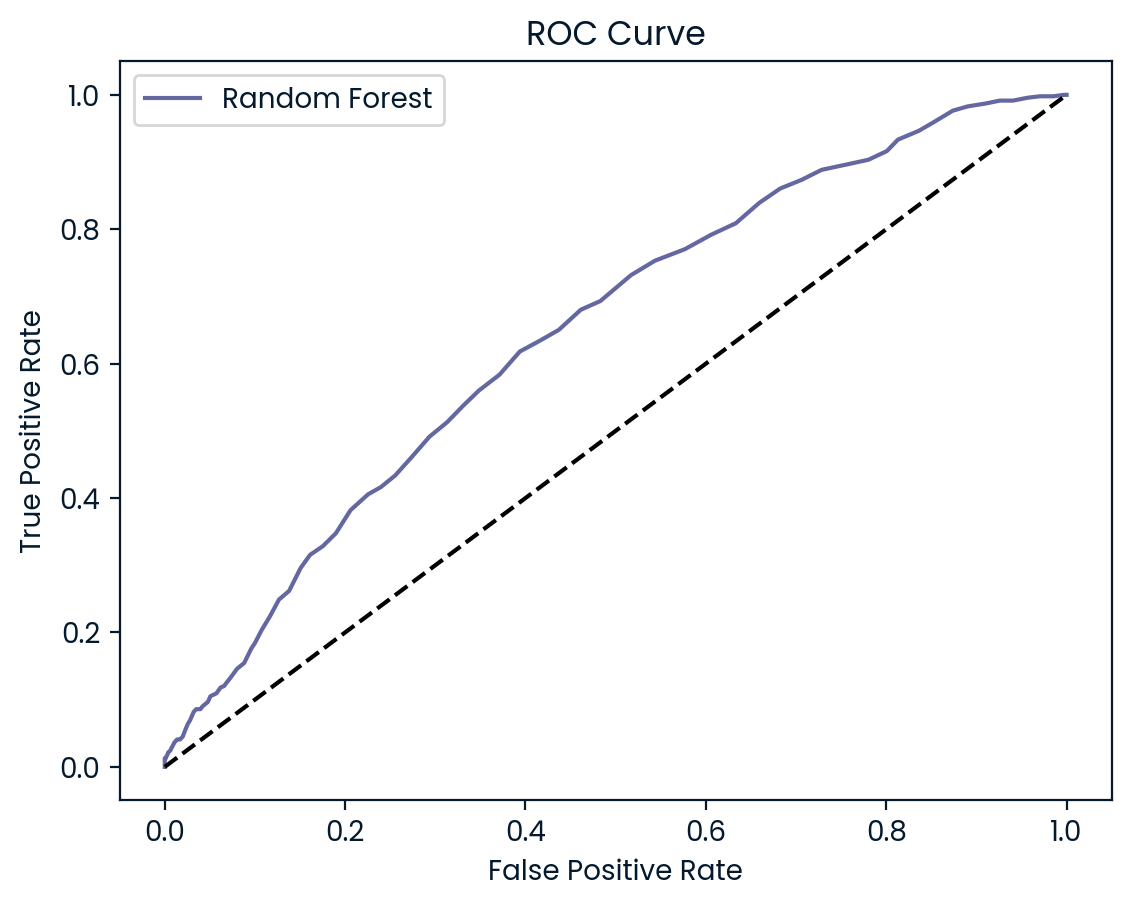

In [60]:
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()